In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [4]:
df_stations = pd.read_csv("stations.csv", index_col= "Station ID")

In [5]:
df_journeys = pd.read_csv("journeys.csv")

# Preparation

### Getting London Coordinates into seperate DataFrame and concat to Stations

In [6]:
cols = ["Capacity", "Latitude", "Longitude", "Station Name"]
rows = ["Germany", "USA", "France", "Italy"]
data = ([0,51.5074,-0.1278,"London City Center"],[0,51.5074,-0.1278,"London City Center"],[0,51.5074,-0.1278,"London City Center"],[0,51.5074,-0.1278,"London City Center"])
print(cols)
print (rows)
print (data)

['Capacity', 'Latitude', 'Longitude', 'Station Name']
['Germany', 'USA', 'France', 'Italy']
([0, 51.5074, -0.1278, 'London City Center'], [0, 51.5074, -0.1278, 'London City Center'], [0, 51.5074, -0.1278, 'London City Center'], [0, 51.5074, -0.1278, 'London City Center'])


In [7]:
df_london_center = pd.DataFrame(data, index = rows, columns= cols)



In [8]:
df_london_center.drop("Germany", inplace = True )

In [9]:
df_london_center.drop("USA", inplace = True)
df_london_center.drop("France", inplace = True)

In [10]:
df_london_center = df_london_center.reset_index().drop("index", axis=1)

In [11]:
df_london_center

Capacity  Latitude  Longitude        Station Name
0         0   51.5074    -0.1278  London City Center

In [12]:
df_stationmerged = pd.concat([df_stations, df_london_center])

In [13]:
df_stationmerged

Capacity   Latitude  Longitude                          Station Name
1          19  51.529163  -0.109970            River Street , Clerkenwell
2          37  51.499606  -0.197574        Phillimore Gardens, Kensington
3          32  51.521283  -0.084605  Christopher Street, Liverpool Street
4          23  51.530059  -0.120973       St. Chad's Street, King's Cross
5          27  51.493130  -0.156876         Sedding Street, Sloane Square
..        ...        ...        ...                                   ...
194        56  51.504627  -0.091773             Hop Exchange, The Borough
195        30  51.507244  -0.106237               Milroy Walk, South Bank
196        17  51.503688  -0.098497             Union Street, The Borough
197        27  51.505569  -0.111606           Stamford Street, South Bank
0           0  51.507400  -0.127800                    London City Center

[774 rows x 4 columns]

# Tasks

## Task 1

### Task 1a

### 1a) Plot Journey Durations
In your journey data, you have the journey duration for all trips. Play around with the plotting tools we talked about - do **journey durations depend on the time of day?**

In [14]:
df_journeys.head()

Journey Duration  Journey ID  End Date  End Month  End Year  End Hour  \
0            2040.0         953        19          9        17        18   
1            1800.0       12581        19          9        17        15   
2            1140.0        1159        15          9        17        17   
3             420.0        2375        14          9        17        12   
4            1200.0       14659        13          9        17        19   

   End Minute  End Station ID  Start Date  Start Month  Start Year  \
0           0             478          19            9          17   
1          21             122          19            9          17   
2           1             639          15            9          17   
3          16             755          14            9          17   
4          33             605          13            9          17   

   Start Hour  Start Minute  Start Station ID  
0          17            26               251  
1          14            51               550  
2          16            42               212  
3          12             9               163  
4          19            13                36

In [15]:
df_journeys["SumMin StartDay"] = df_journeys["Start Minute"] + (df_journeys["Start Hour"]*60)
df_journeys["SumMin EndDay"]= df_journeys["End Minute"] + (df_journeys["End Hour"]*60)


In [16]:
# x = Minute am Tag
# y = Länge der Fahrten
# c = Anzahl der Fahrten in der entsprechenden Länge
# z = Anzahl der Fahrten um diese Uhrzeit

df_journeys_group_1a_1 = df_journeys.groupby("Journey ")



KeyError: 'Journey '

In [17]:
df_journeys.head()

Journey Duration  Journey ID  End Date  End Month  End Year  End Hour  \
0            2040.0         953        19          9        17        18   
1            1800.0       12581        19          9        17        15   
2            1140.0        1159        15          9        17        17   
3             420.0        2375        14          9        17        12   
4            1200.0       14659        13          9        17        19   

   End Minute  End Station ID  Start Date  Start Month  Start Year  \
0           0             478          19            9          17   
1          21             122          19            9          17   
2           1             639          15            9          17   
3          16             755          14            9          17   
4          33             605          13            9          17   

   Start Hour  Start Minute  Start Station ID  SumMin StartDay  SumMin EndDay  
0          17            26               251             1046           1080  
1          14            51               550              891            921  
2          16            42               212             1002           1021  
3          12             9               163              729            736  
4          19            13                36             1153           1173

In [18]:
df_journeys.groupby("Journey Duration").count()

Journey ID  End Date  End Month  End Year  End Hour  \
Journey Duration                                                        
0.0                     1609      1609       1609      1609      1609   
1.0                        2         2          2         2         2   
2.0                       62        62         62        62        62   
3.0                      292       292        292       292       292   
4.0                      179       179        179       179       179   
...                      ...       ...        ...       ...       ...   
1409800.0                  1         1          1         1         1   
1461600.0                  1         1          1         1         1   
1521300.0                  1         1          1         1         1   
1541400.0                  1         1          1         1         1   
1984700.0                  1         1          1         1         1   

                  End Minute  End Station ID  Start Date  Start Month  \
Journey Duration                                                        
0.0                     1609            1609        1609         1609   
1.0                        2               2           2            2   
2.0                       62              62          62           62   
3.0                      292             292         292          292   
4.0                      179             179         179          179   
...                      ...             ...         ...          ...   
1409800.0                  1               1           1            1   
1461600.0                  1               1           1            1   
1521300.0                  1               1           1            1   
1541400.0                  1               1           1            1   
1984700.0                  1               1           1            1   

                  Start Year  Start Hour  Start Minute  Start Station ID  \
Journey Duration                                                           
0.0                     1609        1609          1609              1609   
1.0                        2           2             2                 2   
2.0                       62          62            62                62   
3.0                      292         292           292               292   
4.0                      179         179           179               179   
...                      ...         ...           ...               ...   
1409800.0                  1           1             1                 1   
1461600.0                  1           1             1                 1   
1521300.0                  1           1             1                 1   
1541400.0                  1           1             1                 1   
1984700.0                  1           1             1                 1   

                  SumMin StartDay  SumMin EndDay  
Journey Duration                                  
0.0                          1609           1609  
1.0                             2              2  
2.0                            62             62  
3.0                           292            292  
4.0                           179            179  
...                           ...            ...  
1409800.0                       1              1  
1461600.0                       1              1  
1521300.0                       1              1  
1541400.0                       1              1  
1984700.0                       1              1  

[16512 rows x 15 columns]

In [19]:
df_journeys

Journey Duration  Journey ID  End Date  End Month  End Year  \
0                  2040.0         953        19          9        17   
1                  1800.0       12581        19          9        17   
2                  1140.0        1159        15          9        17   
3                   420.0        2375        14          9        17   
4                  1200.0       14659        13          9        17   
...                   ...         ...       ...        ...       ...   
1542839             270.0        5296         8          8        17   
1542840             911.0       12348         8          8        17   
1542841             447.0        8303         8          8        17   
1542842             424.0       12038         8          8        17   
1542843             307.0        4590         8          8        17   

         End Hour  End Minute  End Station ID  Start Date  Start Month  \
0              18           0             478          19            9   
1              15          21             122          19            9   
2              17           1             639          15            9   
3              12          16             755          14            9   
4              19          33             605          13            9   
...           ...         ...             ...         ...          ...   
1542839         0           2              32           7            8   
1542840         0          13             625           7            8   
1542841         0           7             453           7            8   
1542842         0           6             405           7            8   
1542843         0           4              77           7            8   

         Start Year  Start Hour  Start Minute  Start Station ID  \
0                17          17            26               251   
1                17          14            51               550   
2                17          16            42               212   
3                17          12             9               163   
4                17          19            13                36   
...             ...         ...           ...               ...   
1542839          17          23            58                42   
1542840          17          23            58               222   
1542841          17          23            59               130   
1542842          17          23            59               755   
1542843          17          23            59                25   

         SumMin StartDay  SumMin EndDay  
0                   1046           1080  
1                    891            921  
2                   1002           1021  
3                    729            736  
4                   1153           1173  
...                  ...            ...  
1542839             1438              2  
1542840             1438             13  
1542841             1439              7  
1542842             1439              6  
1542843             1439              4  

[1542844 rows x 16 columns]

In [20]:
df_merge = pd.merge(df_journeys, df_journeys.groupby("Journey Duration").count()["Journey ID"], on="Journey Duration", how="left")

df_merge

Journey Duration  Journey ID_x  End Date  End Month  End Year  \
0                  2040.0           953        19          9        17   
1                  1800.0         12581        19          9        17   
2                  1140.0          1159        15          9        17   
3                   420.0          2375        14          9        17   
4                  1200.0         14659        13          9        17   
...                   ...           ...       ...        ...       ...   
1542839             270.0          5296         8          8        17   
1542840             911.0         12348         8          8        17   
1542841             447.0          8303         8          8        17   
1542842             424.0         12038         8          8        17   
1542843             307.0          4590         8          8        17   

         End Hour  End Minute  End Station ID  Start Date  Start Month  \
0              18           0             478          19            9   
1              15          21             122          19            9   
2              17           1             639          15            9   
3              12          16             755          14            9   
4              19          33             605          13            9   
...           ...         ...             ...         ...          ...   
1542839         0           2              32           7            8   
1542840         0          13             625           7            8   
1542841         0           7             453           7            8   
1542842         0           6             405           7            8   
1542843         0           4              77           7            8   

         Start Year  Start Hour  Start Minute  Start Station ID  \
0                17          17            26               251   
1                17          14            51               550   
2                17          16            42               212   
3                17          12             9               163   
4                17          19            13                36   
...             ...         ...           ...               ...   
1542839          17          23            58                42   
1542840          17          23            58               222   
1542841          17          23            59               130   
1542842          17          23            59               755   
1542843          17          23            59                25   

         SumMin StartDay  SumMin EndDay  Journey ID_y  
0                   1046           1080          2690  
1                    891            921          5010  
2                   1002           1021         18716  
3                    729            736         31403  
4                   1153           1173         17345  
...                  ...            ...           ...  
1542839             1438              2           543  
1542840             1438             13           527  
1542841             1439              7           694  
1542842             1439              6           720  
1542843             1439              4           614  

[1542844 rows x 17 columns]

In [21]:
df_merge.rename({"Journey ID_y":"Sum total rides at duration"}, axis=1, inplace=True)

In [22]:
df_merge

Journey Duration  Journey ID_x  End Date  End Month  End Year  \
0                  2040.0           953        19          9        17   
1                  1800.0         12581        19          9        17   
2                  1140.0          1159        15          9        17   
3                   420.0          2375        14          9        17   
4                  1200.0         14659        13          9        17   
...                   ...           ...       ...        ...       ...   
1542839             270.0          5296         8          8        17   
1542840             911.0         12348         8          8        17   
1542841             447.0          8303         8          8        17   
1542842             424.0         12038         8          8        17   
1542843             307.0          4590         8          8        17   

         End Hour  End Minute  End Station ID  Start Date  Start Month  \
0              18           0             478          19            9   
1              15          21             122          19            9   
2              17           1             639          15            9   
3              12          16             755          14            9   
4              19          33             605          13            9   
...           ...         ...             ...         ...          ...   
1542839         0           2              32           7            8   
1542840         0          13             625           7            8   
1542841         0           7             453           7            8   
1542842         0           6             405           7            8   
1542843         0           4              77           7            8   

         Start Year  Start Hour  Start Minute  Start Station ID  \
0                17          17            26               251   
1                17          14            51               550   
2                17          16            42               212   
3                17          12             9               163   
4                17          19            13                36   
...             ...         ...           ...               ...   
1542839          17          23            58                42   
1542840          17          23            58               222   
1542841          17          23            59               130   
1542842          17          23            59               755   
1542843          17          23            59                25   

         SumMin StartDay  SumMin EndDay  Sum total rides at duration  
0                   1046           1080                         2690  
1                    891            921                         5010  
2                   1002           1021                        18716  
3                    729            736                        31403  
4                   1153           1173                        17345  
...                  ...            ...                          ...  
1542839             1438              2                          543  
1542840             1438             13                          527  
1542841             1439              7                          694  
1542842             1439              6                          720  
1542843             1439              4                          614  

[1542844 rows x 17 columns]

In [23]:
df_merge = pd.merge(df_merge, df_journeys.groupby("SumMin StartDay").count()["Journey ID"], on="SumMin StartDay", how="left")

In [24]:
df_merge.head()

Journey Duration  Journey ID_x  End Date  End Month  End Year  End Hour  \
0            2040.0           953        19          9        17        18   
1            1800.0         12581        19          9        17        15   
2            1140.0          1159        15          9        17        17   
3             420.0          2375        14          9        17        12   
4            1200.0         14659        13          9        17        19   

   End Minute  End Station ID  Start Date  Start Month  Start Year  \
0           0             478          19            9          17   
1          21             122          19            9          17   
2           1             639          15            9          17   
3          16             755          14            9          17   
4          33             605          13            9          17   

   Start Hour  Start Minute  Start Station ID  SumMin StartDay  SumMin EndDay  \
0          17            26               251             1046           1080   
1          14            51               550              891            921   
2          16            42               212             1002           1021   
3          12             9               163              729            736   
4          19            13                36             1153           1173   

   Sum total rides at duration  Journey ID  
0                         2690        2595  
1                         5010        1424  
2                        18716        1916  
3                        31403        1253  
4                        17345        1808

In [25]:
df_merge.rename({"Journey ID":"Sum total rides at MinuteOfDay"}, axis=1, inplace=True)
df_merge.rename({"Journey ID_x":"Journey ID"}, axis=1, inplace=True)

In [26]:
df_merge.rename({"Journey Duration":"Journey Duration in Sek"}, axis=1, inplace=True)

In [27]:
df_merge["Journey Duration"]= df_merge["Journey Duration in Sek"]/60

In [28]:
df_merge.round({"Journey Duration": 0})

Journey Duration in Sek  Journey ID  End Date  End Month  End Year  \
0                         2040.0         953        19          9        17   
1                         1800.0       12581        19          9        17   
2                         1140.0        1159        15          9        17   
3                          420.0        2375        14          9        17   
4                         1200.0       14659        13          9        17   
...                          ...         ...       ...        ...       ...   
1542839                    270.0        5296         8          8        17   
1542840                    911.0       12348         8          8        17   
1542841                    447.0        8303         8          8        17   
1542842                    424.0       12038         8          8        17   
1542843                    307.0        4590         8          8        17   

         End Hour  End Minute  End Station ID  Start Date  Start Month  \
0              18           0             478          19            9   
1              15          21             122          19            9   
2              17           1             639          15            9   
3              12          16             755          14            9   
4              19          33             605          13            9   
...           ...         ...             ...         ...          ...   
1542839         0           2              32           7            8   
1542840         0          13             625           7            8   
1542841         0           7             453           7            8   
1542842         0           6             405           7            8   
1542843         0           4              77           7            8   

         Start Year  Start Hour  Start Minute  Start Station ID  \
0                17          17            26               251   
1                17          14            51               550   
2                17          16            42               212   
3                17          12             9               163   
4                17          19            13                36   
...             ...         ...           ...               ...   
1542839          17          23            58                42   
1542840          17          23            58               222   
1542841          17          23            59               130   
1542842          17          23            59               755   
1542843          17          23            59                25   

         SumMin StartDay  SumMin EndDay  Sum total rides at duration  \
0                   1046           1080                         2690   
1                    891            921                         5010   
2                   1002           1021                        18716   
3                    729            736                        31403   
4                   1153           1173                        17345   
...                  ...            ...                          ...   
1542839             1438              2                          543   
1542840             1438             13                          527   
1542841             1439              7                          694   
1542842             1439              6                          720   
1542843             1439              4                          614   

         Sum total rides at MinuteOfDay  Journey Duration  
0                                  2595              34.0  
1                                  1424              30.0  
2                                  1916              19.0  
3                                  1253               7.0  
4                                  1808              20.0  
...                                 ...               ...  
1542839                             265               4.0  
1542840              

In [29]:
df_merge

Journey Duration in Sek  Journey ID  End Date  End Month  End Year  \
0                         2040.0         953        19          9        17   
1                         1800.0       12581        19          9        17   
2                         1140.0        1159        15          9        17   
3                          420.0        2375        14          9        17   
4                         1200.0       14659        13          9        17   
...                          ...         ...       ...        ...       ...   
1542839                    270.0        5296         8          8        17   
1542840                    911.0       12348         8          8        17   
1542841                    447.0        8303         8          8        17   
1542842                    424.0       12038         8          8        17   
1542843                    307.0        4590         8          8        17   

         End Hour  End Minute  End Station ID  Start Date  Start Month  \
0              18           0             478          19            9   
1              15          21             122          19            9   
2              17           1             639          15            9   
3              12          16             755          14            9   
4              19          33             605          13            9   
...           ...         ...             ...         ...          ...   
1542839         0           2              32           7            8   
1542840         0          13             625           7            8   
1542841         0           7             453           7            8   
1542842         0           6             405           7            8   
1542843         0           4              77           7            8   

         Start Year  Start Hour  Start Minute  Start Station ID  \
0                17          17            26               251   
1                17          14            51               550   
2                17          16            42               212   
3                17          12             9               163   
4                17          19            13                36   
...             ...         ...           ...               ...   
1542839          17          23            58                42   
1542840          17          23            58               222   
1542841          17          23            59               130   
1542842          17          23            59               755   
1542843          17          23            59                25   

         SumMin StartDay  SumMin EndDay  Sum total rides at duration  \
0                   1046           1080                         2690   
1                    891            921                         5010   
2                   1002           1021                        18716   
3                    729            736                        31403   
4                   1153           1173                        17345   
...                  ...            ...                          ...   
1542839             1438              2                          543   
1542840             1438             13                          527   
1542841             1439              7                          694   
1542842             1439              6                          720   
1542843             1439              4                          614   

         Sum total rides at MinuteOfDay  Journey Duration  
0                                  2595         34.000000  
1                                  1424         30.000000  
2                                  1916         19.000000  
3                                  1253          7.000000  
4                                  1808         20.000000  
...                                 ...               ...  
1542839                             265          4.500000  
1542840              

In [30]:
df_merge["SumDuration"] = df_merge["Sum total rides at duration"]/1000

In [31]:
df_merge

Journey Duration in Sek  Journey ID  End Date  End Month  End Year  \
0                         2040.0         953        19          9        17   
1                         1800.0       12581        19          9        17   
2                         1140.0        1159        15          9        17   
3                          420.0        2375        14          9        17   
4                         1200.0       14659        13          9        17   
...                          ...         ...       ...        ...       ...   
1542839                    270.0        5296         8          8        17   
1542840                    911.0       12348         8          8        17   
1542841                    447.0        8303         8          8        17   
1542842                    424.0       12038         8          8        17   
1542843                    307.0        4590         8          8        17   

         End Hour  End Minute  End Station ID  Start Date  Start Month  \
0              18           0             478          19            9   
1              15          21             122          19            9   
2              17           1             639          15            9   
3              12          16             755          14            9   
4              19          33             605          13            9   
...           ...         ...             ...         ...          ...   
1542839         0           2              32           7            8   
1542840         0          13             625           7            8   
1542841         0           7             453           7            8   
1542842         0           6             405           7            8   
1542843         0           4              77           7            8   

         Start Year  Start Hour  Start Minute  Start Station ID  \
0                17          17            26               251   
1                17          14            51               550   
2                17          16            42               212   
3                17          12             9               163   
4                17          19            13                36   
...             ...         ...           ...               ...   
1542839          17          23            58                42   
1542840          17          23            58               222   
1542841          17          23            59               130   
1542842          17          23            59               755   
1542843          17          23            59                25   

         SumMin StartDay  SumMin EndDay  Sum total rides at duration  \
0                   1046           1080                         2690   
1                    891            921                         5010   
2                   1002           1021                        18716   
3                    729            736                        31403   
4                   1153           1173                        17345   
...                  ...            ...                          ...   
1542839             1438              2                          543   
1542840             1438             13                          527   
1542841             1439              7                          694   
1542842             1439              6                          720   
1542843             1439              4                          614   

         Sum total rides at MinuteOfDay  Journey Duration  SumDuration  
0                                  2595         34.000000        2.690  
1                                  1424         30.000000        5.010  
2                                  1916         19.000000       18.716  
3                                  1253          7.000000       31.403  
4                                  1808         20.000000       17.345  
...                                 ...               ...      

In [32]:
df_merge["Journey Duration"].max()

33078.333333333336

In [33]:
df_merge[df_merge["Journey Duration"]<180].count()

Journey Duration in Sek           1533321
Journey ID                        1533321
End Date                          1533321
End Month                         1533321
End Year                          1533321
End Hour                          1533321
End Minute                        1533321
End Station ID                    1533321
Start Date                        1533321
Start Month                       1533321
Start Year                        1533321
Start Hour                        1533321
Start Minute                      1533321
Start Station ID                  1533321
SumMin StartDay                   1533321
SumMin EndDay                     1533321
Sum total rides at duration       1533321
Sum total rides at MinuteOfDay    1533321
Journey Duration                  1533321
SumDuration                       1533321
dtype: int64

In [34]:
df_journeys.groupby("Journey Duration").count()["Journey ID"]

Journey Duration
0.0          1609
1.0             2
2.0            62
3.0           292
4.0           179
             ... 
1409800.0       1
1461600.0       1
1521300.0       1
1541400.0       1
1984700.0       1
Name: Journey ID, Length: 16512, dtype: int64

In [35]:
df_journeys.groupby("SumMin StartDay").count()

Journey Duration  Journey ID  End Date  End Month  End Year  \
SumMin StartDay                                                                
0                             258         258       258        258       258   
1                             307         307       307        307       307   
2                             313         313       313        313       313   
3                             282         282       282        282       282   
4                             330         330       330        330       330   
...                           ...         ...       ...        ...       ...   
1435                          311         311       311        311       311   
1436                          314         314       314        314       314   
1437                          298         298       298        298       298   
1438                          265         265       265        265       265   
1439                          308         308       308        308       308   

                 End Hour  End Minute  End Station ID  Start Date  \
SumMin StartDay                                                     
0                     258         258             258         258   
1                     307         307             307         307   
2                     313         313             313         313   
3                     282         282             282         282   
4                     330         330             330         330   
...                   ...         ...             ...         ...   
1435                  311         311             311         311   
1436                  314         314             314         314   
1437                  298         298             298         298   
1438                  265         265             265         265   
1439                  308         308             308         308   

                 Start Month  Start Year  Start Hour  Start Minute  \
SumMin StartDay                                                      
0                        258         258         258           258   
1                        307         307         307           307   
2                        313         313         313           313   
3                        282         282         282           282   
4                        330         330         330           330   
...                      ...         ...         ...           ...   
1435                     311         311         311           311   
1436                     314         314         314           314   
1437                     298         298         298           298   
1438                     265         265         265           265   
1439                     308         308         308           308   

                 Start Station ID  SumMin EndDay  
SumMin StartDay                                   
0                             258            258  
1                             307            307  
2                             313            313  
3                             282            282  
4                             330            330  
...                           ...            ...  
1435                          311            311  
1436                          314            314  
1437                          298            298  
1438                          265            265  
1439                          308            308  

[1440 rows x 15 columns]

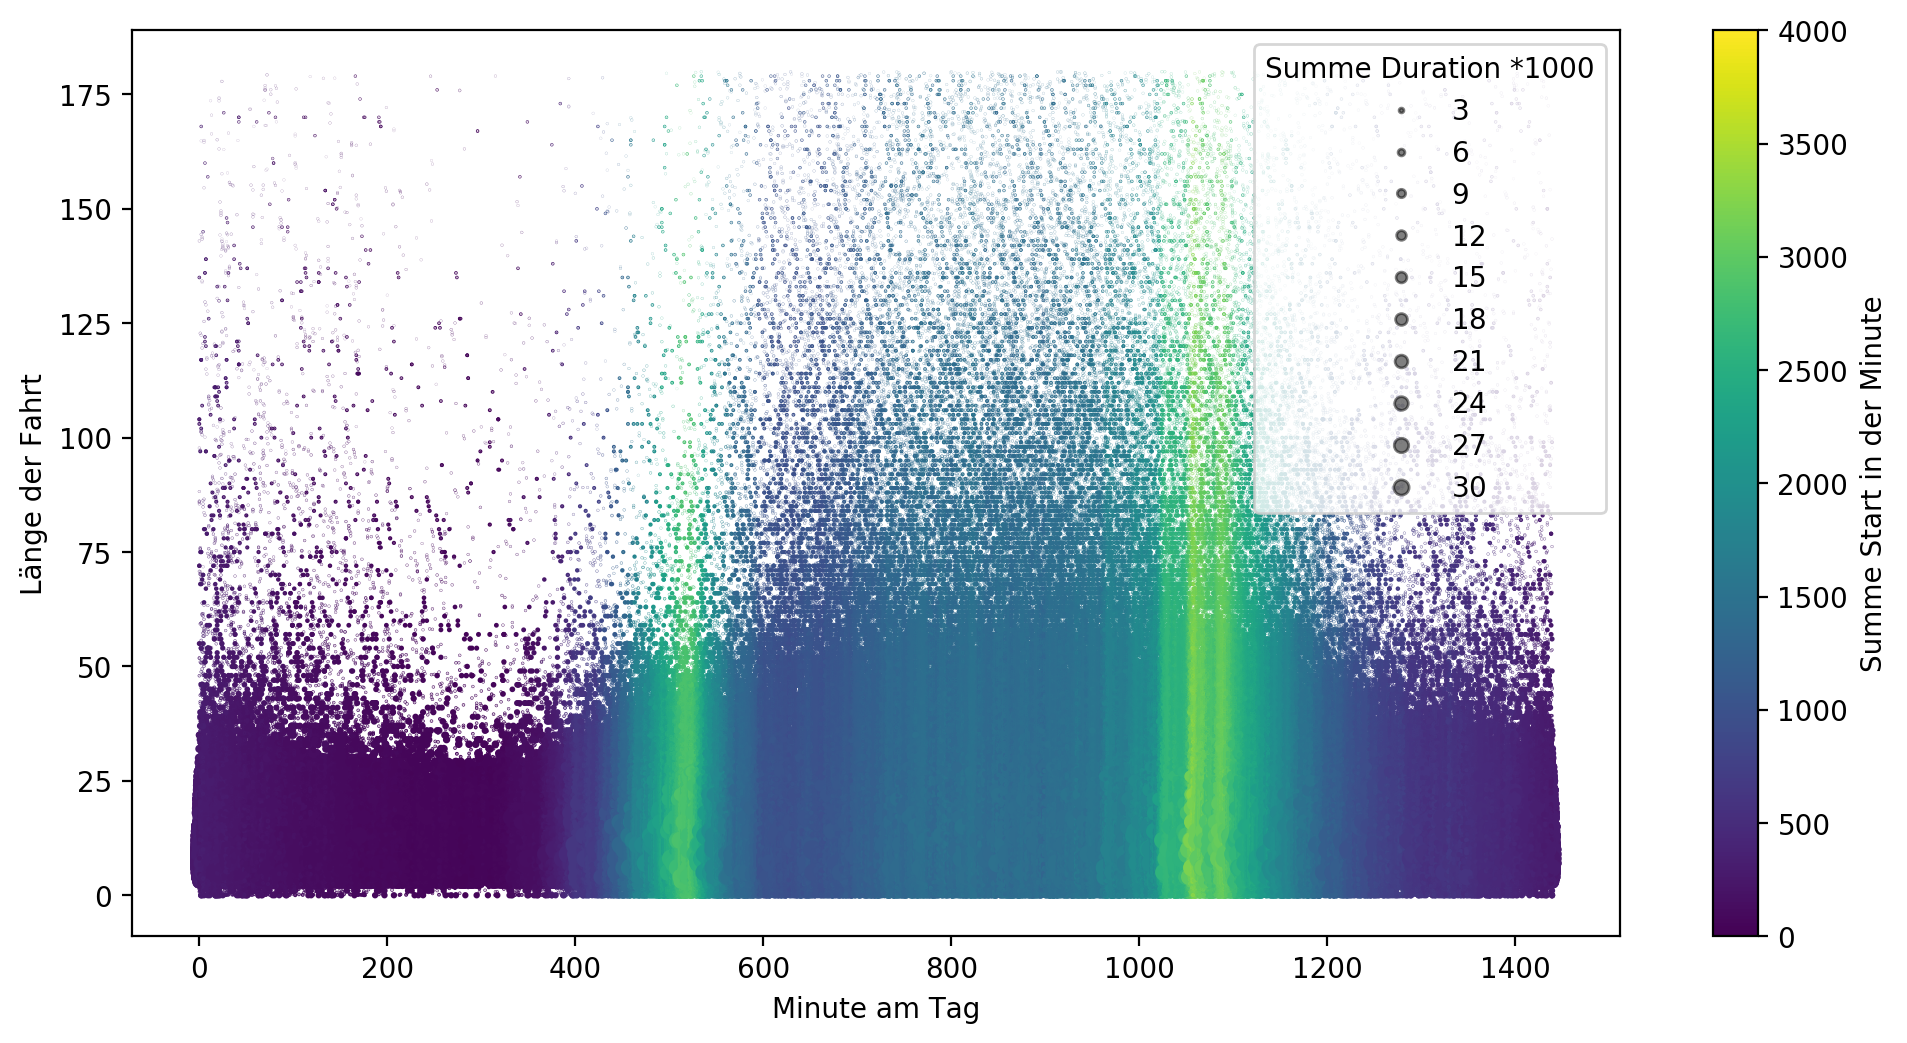

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6), dpi=200)

scatter = ax.scatter(x=df_merge[df_merge["Journey Duration"]<180]["SumMin StartDay"], 
                         y=df_merge[df_merge["Journey Duration"]<180]["Journey Duration"], 
                         s=df_merge[df_merge["Journey Duration"]<180]["SumDuration"], 
                         c=df_merge[df_merge["Journey Duration"]<180]["Sum total rides at MinuteOfDay"])

ax.set_xlabel("Minute am Tag")
ax.set_ylabel("Länge der Fahrt")

scatter.set_clim([0,4000])

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label("Summe Start in der Minute")

size_handles, size_labels = scatter.legend_elements(prop="sizes", alpha=0.5)
ax.legend(size_handles, size_labels, loc="upper right", title="Summe Duration *1000")

plt.show()

### 1b) Predict Journey Durations
You have lot's of information for the trip. Use just the data that is known at the beginning of the trip (i.e., start time and start station) to predict the journy duration. Use any regression model your a comfortable with.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
import seaborn as sns

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
df_merge.head()

Journey Duration in Sek  Journey ID  End Date  End Month  End Year  \
0                   2040.0         953        19          9        17   
1                   1800.0       12581        19          9        17   
2                   1140.0        1159        15          9        17   
3                    420.0        2375        14          9        17   
4                   1200.0       14659        13          9        17   

   End Hour  End Minute  End Station ID  Start Date  Start Month  Start Year  \
0        18           0             478          19            9          17   
1        15          21             122          19            9          17   
2        17           1             639          15            9          17   
3        12          16             755          14            9          17   
4        19          33             605          13            9          17   

   Start Hour  Start Minute  Start Station ID  SumMin StartDay  SumMin EndDay  \
0          17            26               251             1046           1080   
1          14            51               550              891            921   
2          16            42               212             1002           1021   
3          12             9               163              729            736   
4          19            13                36             1153           1173   

   Sum total rides at duration  Sum total rides at MinuteOfDay  \
0                         2690                            2595   
1                         5010                            1424   
2                        18716                            1916   
3                        31403                            1253   
4                        17345                            1808   

   Journey Duration  SumDuration  
0              34.0        2.690  
1              30.0        5.010  
2              19.0       18.716  
3               7.0       31.403  
4              20.0       17.345

In [42]:
df_journeys_small = df_journeys[df_journeys["Journey Duration"]<3600]

In [43]:

df_start_rough = df_journeys_small[["SumMin StartDay", "Start Station ID"]]
df_predict_rough = df_journeys_small["Journey Duration"]

df_start_detail = df_journeys_small[["SumMin StartDay", "Start Station ID", "Start Hour", "Start Minute"]]
df_predict_detail = df_journeys_small["Journey Duration"]


In [44]:
start_rough_train, start_rough_test, predict_rough_train, predict_rough_test = train_test_split(df_start_rough, df_predict_rough, test_size=0.3)
start_detail_train, start_detail_test, predict_detail_train, predict_detail_test = train_test_split(df_start_detail, df_predict_detail, test_size=0.3)

In [45]:
df_start_rough


SumMin StartDay  Start Station ID
0                   1046               251
1                    891               550
2                   1002               212
3                    729               163
4                   1153                36
...                  ...               ...
1542839             1438                42
1542840             1438               222
1542841             1439               130
1542842             1439               755
1542843             1439                25

[1475473 rows x 2 columns]

In [117]:

df_predict_rough

0          2040.0
1          1800.0
2          1140.0
3           420.0
4          1200.0
            ...  
1542839     270.0
1542840     911.0
1542841     447.0
1542842     424.0
1542843     307.0
Name: Journey Duration, Length: 1475473, dtype: float64

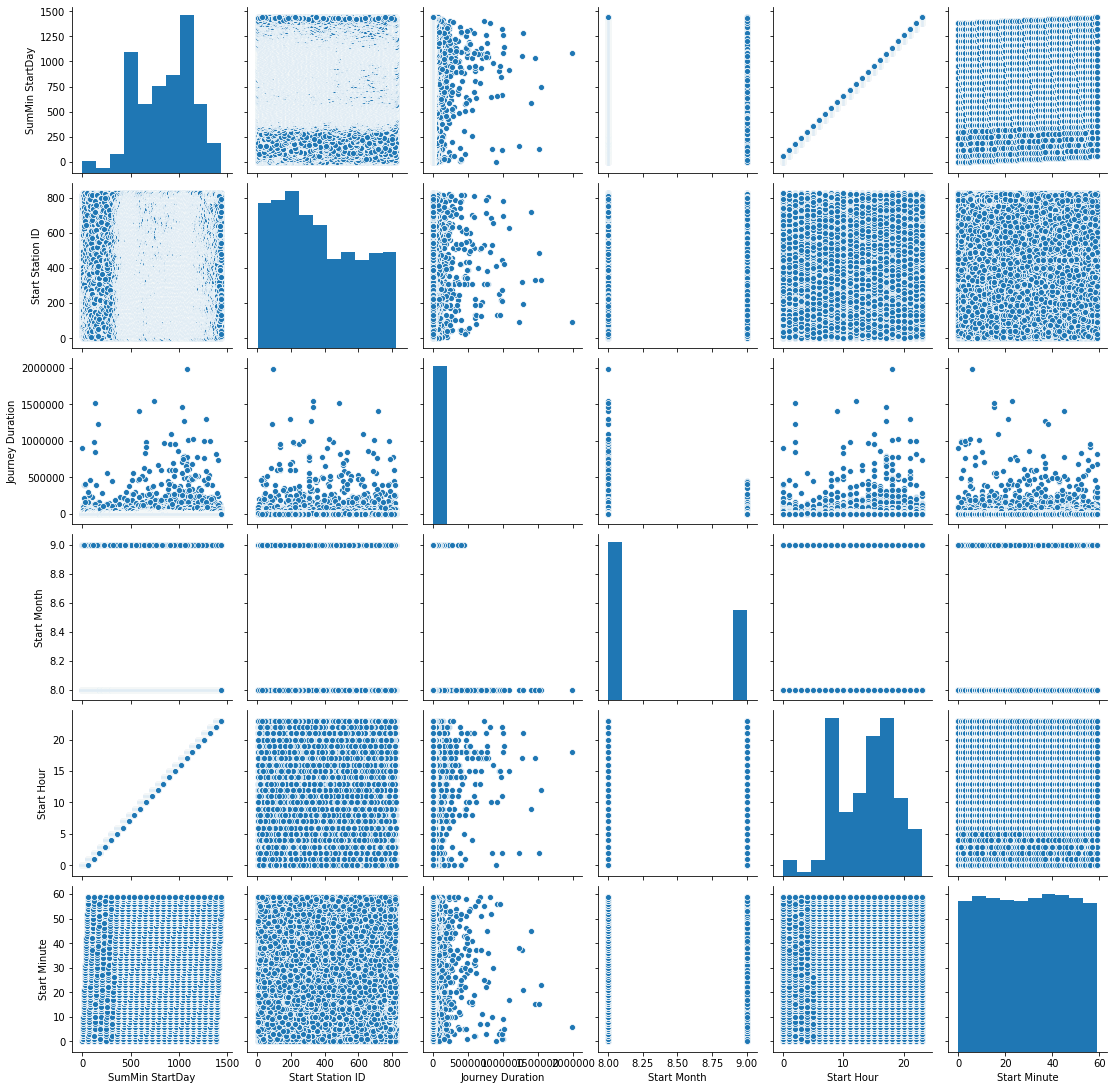

In [90]:
sns.pairplot(df_journeys[["SumMin StartDay", "Start Station ID", "Journey Duration",  "Start Hour", "Start Minute"]])

In [46]:
st_scaler = StandardScaler()
st_scaler.fit(df_start_rough)
start_rough_train_scaled = st_scaler.transform(start_rough_train)

In [47]:
lin = LinearRegression()
lin.fit(start_rough_train_scaled, predict_rough_train)


start_rough_test_scaled = st_scaler.transform(start_rough_test)
predict_rough_predict = lin.predict(start_rough_test_scaled)

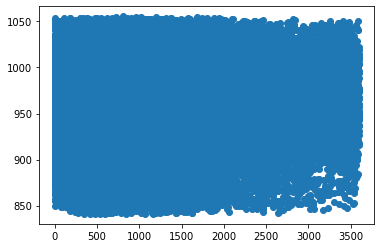

In [48]:
plt.scatter(predict_rough_test, predict_rough_predict)

## Task 2
### Stations

In [49]:
import folium
import pandas as pd

In [50]:
m = folium.Map(location = [51.509865, -0.118092], zoom_start=10)
m

In [51]:
tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png'
attr="Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL."

In [52]:
m = folium.Map(location = [51.509865, -0.118092], zoom_start=10, tiles=tiles, attr=attr)
m

In [53]:
folium.Choropleth(
    geo_data=f"boroughs.geojson").add_to(m)
m

In [54]:
stations_df = pd.read_csv("stations.csv", index_col=0).reset_index()

In [55]:
import json
import vincenty
from shapely.geometry import shape, Point

In [78]:
df_stations.head()

Capacity   Latitude  Longitude  \
Station ID                                   
1                 19  51.529163  -0.109970   
2                 37  51.499606  -0.197574   
3                 32  51.521283  -0.084605   
4                 23  51.530059  -0.120973   
5                 27  51.493130  -0.156876   

                                    Station Name  
Station ID                                        
1                     River Street , Clerkenwell  
2                 Phillimore Gardens, Kensington  
3           Christopher Street, Liverpool Street  
4                St. Chad's Street, King's Cross  
5                  Sedding Street, Sloane Square

In [59]:


with open('boroughs.geojson') as f:
    geo = json.load(f)

# In which state is the **center** of Germany
# Note reverse notation compared to before
#searchpoint = Point(-0.109970, 51.529163)
searchpoint = Point(df_london_center["Longitude"], df_london_center["Latitude"])

for feature in geo['features']:
    polygon = shape(feature['geometry'])
    if polygon.contains(searchpoint):
        print('Found containing polygon:', feature["properties"]["name"])

Found containing polygon: Westminster


In [79]:
stations_df_copy = df_stations

In [80]:
stations_df_copy

Capacity   Latitude  Longitude  \
Station ID                                   
1                 19  51.529163  -0.109970   
2                 37  51.499606  -0.197574   
3                 32  51.521283  -0.084605   
4                 23  51.530059  -0.120973   
5                 27  51.493130  -0.156876   
...              ...        ...        ...   
190               21  51.489975  -0.132845   
194               56  51.504627  -0.091773   
195               30  51.507244  -0.106237   
196               17  51.503688  -0.098497   
197               27  51.505569  -0.111606   

                                    Station Name  
Station ID                                        
1                     River Street , Clerkenwell  
2                 Phillimore Gardens, Kensington  
3           Christopher Street, Liverpool Street  
4                St. Chad's Street, King's Cross  
5                  Sedding Street, Sloane Square  
...                                          ...  
190                     Rampayne Street, Pimlico  
194                    Hop Exchange, The Borough  
195                      Milroy Walk, South Bank  
196                    Union Street, The Borough  
197                  Stamford Street, South Bank  

[773 rows x 4 columns]

In [62]:
Point.describe()

AttributeError: type object 'Point' has no attribute 'describe'

In [71]:
for stations_df_copy["Longitude"] in stations_df_copy:
	try:
		float(variable)
		return("Konnte zu float konvertiert werden")
	except:
		return("Konnte nicht zu float konvertiert werden")

SyntaxError: 'return' outside function (<ipython-input-71-fdc68fbc16e4>, line 4)

In [63]:
#stations_df_copy.drop("Station Name", axis=1)

In [81]:
for stations_df["Station Name"] in stations_df_copy:
    for feature in geo['features']:
        #x = stations_df_copy["Longitude"]
        #y = stations_df_copy["Latitude"]
        searchpoint = Point(stations_df_copy["Longitude"],stations_df_copy["Latitude"])
        polygon = shape(feature['geometry'])
        if polygon.contains(searchpoint):
                stations_df_copy["borough"]=feature["properties"]["name"]
                            

TypeError: cannot convert the series to <class 'float'>

In [168]:
for i in stations_df_copy:
    for feature in geo['features']:
        x = stations_df_copy["Longitude"]
        print (x)
        y = stations_df_copy["Latitude"]

0     -0.109970
1     -0.197574
2     -0.084605
3     -0.120973
4     -0.156876
         ...   
768   -0.132845
769   -0.091773
770   -0.106237
771   -0.098497
772   -0.111606
Name: Longitude, Length: 773, dtype: float64
0     -0.109970
1     -0.197574
2     -0.084605
3     -0.120973
4     -0.156876
         ...   
768   -0.132845
769   -0.091773
770   -0.106237
771   -0.098497
772   -0.111606
Name: Longitude, Length: 773, dtype: float64
0     -0.109970
1     -0.197574
2     -0.084605
3     -0.120973
4     -0.156876
         ...   
768   -0.132845
769   -0.091773
770   -0.106237
771   -0.098497
772   -0.111606
Name: Longitude, Length: 773, dtype: float64
0     -0.109970
1     -0.197574
2     -0.084605
3     -0.120973
4     -0.156876
         ...   
768   -0.132845
769   -0.091773
770   -0.106237
771   -0.098497
772   -0.111606
Name: Longitude, Length: 773, dtype: float64
0     -0.109970
1     -0.197574
2     -0.084605
3     -0.120973
4     -0.156876
         ...   
768   -0.132845
769 

In [148]:
print(geo)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[0.148209, 51.599635], [0.148199, 51.599632], [0.147274, 51.599029], [0.144452, 51.597322], [0.143582, 51.596786], [0.141744, 51.595651], [0.139051, 51.594025], [0.138701, 51.593859], [0.138041, 51.593529], [0.134815, 51.591955], [0.133724, 51.591438], [0.132193, 51.59069], [0.13117, 51.590239], [0.131206, 51.590118], [0.131373, 51.589696], [0.131482, 51.589537], [0.131734, 51.589084], [0.131914, 51.588786], [0.132077, 51.588547], [0.132275, 51.588305], [0.132653, 51.587687], [0.131125, 51.587433], [0.131146, 51.587378], [0.128039, 51.586885], [0.129025, 51.584624], [0.128917, 51.584113], [0.129322, 51.584103], [0.129677, 51.58344], [0.129556, 51.5825], [0.129369, 51.582359], [0.129277, 51.581816], [0.129318, 51.581813], [0.130865, 51.58169], [0.134205, 51.581495], [0.134249, 51.581391], [0.1343, 51.58127], [0.134578, 51.581076], [0.134484, 51.580996], [0.134681, 51.580

In [77]:
df_stations.head()

Capacity   Latitude  Longitude  \
Station ID                                   
1                 19  51.529163  -0.109970   
2                 37  51.499606  -0.197574   
3                 32  51.521283  -0.084605   
4                 23  51.530059  -0.120973   
5                 27  51.493130  -0.156876   

                                    Station Name  
Station ID                                        
1                     River Street , Clerkenwell  
2                 Phillimore Gardens, Kensington  
3           Christopher Street, Liverpool Street  
4                St. Chad's Street, King's Cross  
5                  Sedding Street, Sloane Square

In [84]:
df_journeys.head()

Journey Duration  Journey ID  End Date  End Month  End Year  End Hour  \
0            2040.0         953        19          9        17        18   
1            1800.0       12581        19          9        17        15   
2            1140.0        1159        15          9        17        17   
3             420.0        2375        14          9        17        12   
4            1200.0       14659        13          9        17        19   

   End Minute  End Station ID  Start Date  Start Month  Start Year  \
0           0             478          19            9          17   
1          21             122          19            9          17   
2           1             639          15            9          17   
3          16             755          14            9          17   
4          33             605          13            9          17   

   Start Hour  Start Minute  Start Station ID  SumMin StartDay  SumMin EndDay  
0          17            26               251             1046           1080  
1          14            51               550              891            921  
2          16            42               212             1002           1021  
3          12             9               163              729            736  
4          19            13                36             1153           1173

In [85]:
df_journeys_copy = df_journeys

In [86]:
df_journeys_copy["Station ID"] = df_journeys_copy["Start Station ID"]

In [88]:
pd.merge(df_stations, df_journeys, on="Station ID", how="inner" )

Station ID  Capacity   Latitude  Longitude  \
0                 1        19  51.529163  -0.109970   
1                 1        19  51.529163  -0.109970   
2                 1        19  51.529163  -0.109970   
3                 1        19  51.529163  -0.109970   
4                 1        19  51.529163  -0.109970   
...             ...       ...        ...        ...   
1530235         197        27  51.505569  -0.111606   
1530236         197        27  51.505569  -0.111606   
1530237         197        27  51.505569  -0.111606   
1530238         197        27  51.505569  -0.111606   
1530239         197        27  51.505569  -0.111606   

                        Station Name  Journey Duration  Journey ID  End Date  \
0         River Street , Clerkenwell             540.0        3190        17   
1         River Street , Clerkenwell             600.0       10767        14   
2         River Street , Clerkenwell             660.0        7492        18   
3         River Street , Clerkenwell             660.0        5099        13   
4         River Street , Clerkenwell             600.0        5743        19   
...                              ...               ...         ...       ...   
1530235  Stamford Street, South Bank             312.0        4720         7   
1530236  Stamford Street, South Bank            5172.0       10653         8   
1530237  Stamford Street, South Bank            5107.0        4473         8   
1530238  Stamford Street, South Bank            5094.0        8259         8   
1530239  Stamford Street, South Bank            5102.0        1772         8   

         End Month  End Year  ...  End Minute  End Station ID  Start Date  \
0                9        17  ...          56              75          17   
1                9        17  ...          11             136          14   
2                9        17  ...          57             136          18   
3                9        17  ...          50             136          13   
4                9        17  ...           0             136          19   
...            ...       ...  ...         ...             ...         ...   
1530235          8        17  ...           1             420           7   
1530236          8        17  ...           9             197           7   
1530237          8        17  ...          10             197           7   
1530238          8        17  ...           9             197           7   
1530239          8        17  ...          10             197           7   

         Start Month  Start Year  Start Hour  Start Minute  Start Station ID  \
0                  9          17          12            47                 1   
1                  9          17           7             1                 1   
2                  9          17           6            46                 1   
3                  9          17           6            39                 1   
4                  9          17           6            50                 1   
...              ...         ...         ...           ...               ...   
1530235            8          17          21            56               197   
1530236            8          17          23            43               197   
1530237            8          17          23            44               197   
1530238            8          17          23            44               197   
1530239            8          17          23            45               197   

         SumMin StartDay  SumMin EndDay  
0                    767            776  
1                    421            431  
2                    406            417  
3                    399            410  
4                    410            420  
...                  ...            ...  
1530235             1316           1321  
1530236             1423             69  
1530237             1424             70  
1530238             1424             69  
1530239             1425             70

In [ ]:
outer_merge_df = pd.merge(countries_df, countries_df2, on="Countries", how="outer")